In [1]:
using Plots, Statistics
theme(:dark)

In [2]:
distance(p1,p2) = sqrt((p1[1] - p2[1])^2 + (p1[2] - p2[2])^2)

distance (generic function with 1 method)

In [16]:
cluster1 = [p for p in zip(rand(1:50, 50), rand(1:70, 50))]
cluster2 = [p for p in zip(rand(45:70, 50), rand(45:80, 50))]
X = [x for x in cluster1]
for x in cluster2
    push!(X, x)
end

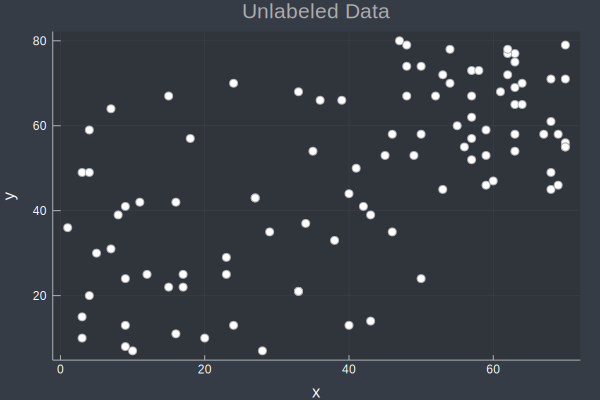

In [17]:
scatter(X, 
        title = "Unlabeled Data",
        legend = false,
        xaxis = "x",
        yaxis = "y",
        color = "white")

In [18]:
function k_Means_Assignment(X, centers, k)
    distances = []
    for p in X
        temp_distances = [(j, distance(p, centers[j])) for j = 1:length(centers)]
        sort!(temp_distances, by = x -> x[2])
        push!(distances, (p, temp_distances[1][1], temp_distances[1][2]))
    end
    new_centers = copy(centers)
    for j = 1:k
        new_centers[j] = (mean([x[1][1] for x in distances if x[2] == j]), 
                            mean([x[1][2] for x in distances if x[2] == j]))
    end
    
    return new_centers
end
                                        
function k_Means_Clustering(X, k, ϵ)
    centers = [(rand(0.0:70.0), rand(0.0:80.0)) for _ = 1:k]
    new_centers = k_Means_Assignment(X, centers, k)
    while maximum([distance(centers[i], new_centers[i]) for i = 1:k]) > ϵ
        centers, new_centers = new_centers, k_Means_Assignment(X, new_centers, k)
    end
    return new_centers
end

k_Means_Clustering (generic function with 1 method)

In [19]:
Centers = k_Means_Clustering(X, 4, 0.05)

4-element Array{Tuple{Float64,Float64},1}:
 (10.0, 51.25)                         
 (39.63157894736842, 46.68421052631579)
 (17.52173913043478, 18.08695652173913)
 (60.32608695652174, 64.23913043478261)

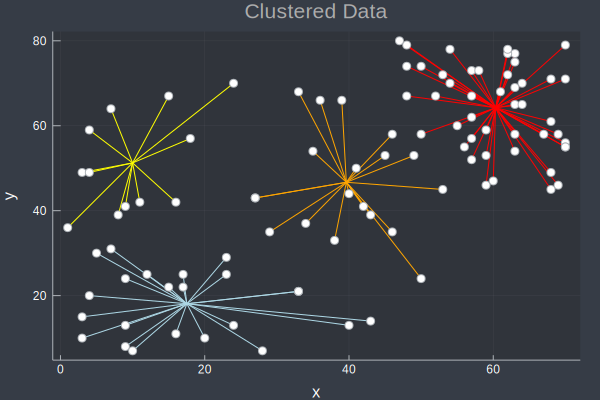

In [20]:
plot(title = "Clustered Data",
     legend = false,
     xaxis = "x",
     yaxis = "y")
for p in X
    temp_distances = [(j, distance(p, Centers[j])) for j = 1:4]
    sort!(temp_distances, by = x -> x[2])
    if temp_distances[1][1] == 1
        lcolor = "yellow"
    elseif temp_distances[1][1] == 2
        lcolor = "orange"
    elseif temp_distances[1][1] == 3
        lcolor = "lightblue"
    else
        lcolor = "red"
    end
    plot!([p, Centers[temp_distances[1][1]]], 
           color = lcolor)
end
scatter!(X, color = "white")

In [10]:
plot(title = "Clustered Data",
     legend = false,
     xaxis = "x",
     yaxis = "y")
for p in X
    temp_distances = [(j, distance(p, Centers[j])) for j = 1:4]
    sort!(temp_distances, by = x -> x[2])
    if temp_distances[1][1] == 1
        scatter!(p, color = "yellow")
    elseif temp_distances[1][1] == 2
        scatter!(p, color = "orange")
    elseif temp_distances[1][1] == 3
        scatter!(p, color = "lightblue")
    else
        scatter!(p, color = "red")
    end
end
scatter!()

UndefVarError: UndefVarError: plot not defined

In [1]:
using CSV

In [3]:
data = CSV.read("buddymove_holidayiq.csv")

,User Id,Sports,Religious,Nature,Theatre,Shopping,Picnic
,String⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰
1,User 1,2,77,79,69,68,95
2,User 2,2,62,76,76,69,68
3,User 3,2,50,97,87,50,75
4,User 4,2,68,77,95,76,61
5,User 5,2,98,54,59,95,86
6,User 6,3,52,109,93,52,76
7,User 7,3,64,85,82,73,69
8,User 8,3,54,107,92,54,76
9,User 9,3,64,108,64,54,93


In [9]:
data[1:end,2:end]

,Sports,Religious,Nature,Theatre,Shopping,Picnic
,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰
1,2,77,79,69,68,95
2,2,62,76,76,69,68
3,2,50,97,87,50,75
4,2,68,77,95,76,61
5,2,98,54,59,95,86
6,3,52,109,93,52,76
7,3,64,85,82,73,69
8,3,54,107,92,54,76
9,3,64,108,64,54,93
